In [80]:
import numpy as np
import skimage.io as ski
import matplotlib.pyplot as plt
import skimage.color as skc
from skimage.feature import canny
from scipy import ndimage as ndi
from skimage import morphology
import os
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk
%matplotlib inline

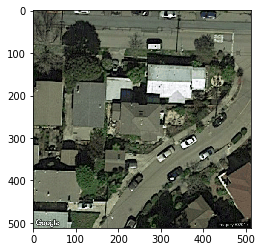

In [3]:
map_im = ski.imread("720+enseneda+Berkeley+CA.png")
plt.imshow(map_im)

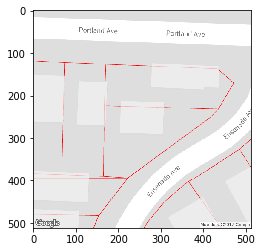

In [4]:
outline_im = ski.imread("outs/720+enseneda+Berkeley+CA.png")
plt.imshow(outline_im)

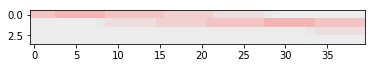

In [33]:
plt.imshow(outline_im[100:150, 290:330][30:40][2:6])

In [32]:
outline_im[100:150, 290:330][30:40][2:6]

array([[[244, 196, 196],
        [244, 196, 196],
        [244, 196, 196],
        [244, 180, 180],
        [244, 180, 180],
        [244, 180, 180],
        [244, 180, 180],
        [244, 180, 180],
        [244, 180, 180],
        [244, 196, 196],
        [244, 196, 196],
        [244, 196, 196],
        [244, 196, 196],
        [244, 196, 196],
        [244, 196, 196],
        [244, 196, 196],
        [241, 208, 208],
        [241, 208, 208],
        [241, 208, 208],
        [241, 208, 208],
        [241, 208, 208],
        [241, 208, 208],
        [237, 223, 223],
        [237, 223, 223],
        [237, 223, 223],
        [237, 223, 223],
        [237, 223, 223],
        [237, 223, 223],
        [232, 232, 232],
        [236, 236, 236],
        [236, 236, 236],
        [236, 236, 236],
        [236, 236, 236],
        [236, 236, 236],
        [236, 236, 236],
        [236, 236, 236],
        [236, 236, 236],
        [236, 236, 236],
        [236, 236, 236],
        [236, 236, 236]],

In [34]:
copy_out = np.empty_like (outline_im)
copy_out[:] = outline_im
for i in range(512):
    for j in range(512):                          
        if((copy_out[i][j][0] != 224 and copy_out[i][j][1] != 208 and copy_out[i][j][2] != 208) and (copy_out[i][j][0] != 229 and copy_out[i][j][1] != 168 and copy_out[i][j][2] != 168) and (copy_out[i][j][0] != 237 and copy_out[i][j][1] != 112 and copy_out[i][j][2] != 112)and (copy_out[i][j][0] != 244 and copy_out[i][j][1] != 196 and copy_out[i][j][2] != 196)and (copy_out[i][j][0] != 244 and copy_out[i][j][1] != 180 and copy_out[i][j][2] != 180) and (copy_out[i][j][0] != 241 and copy_out[i][j][1] != 208 and copy_out[i][j][2] != 208) ):
            copy_out[i][j][0] = 0
            copy_out[i][j][1] = 0
            copy_out[i][j][2] = 0
        else:
            copy_out[i][j][0] = 255
            copy_out[i][j][1] = 255
            copy_out[i][j][2] = 255

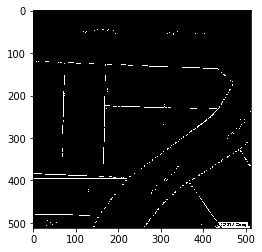

In [35]:
plt.imshow(copy_out)

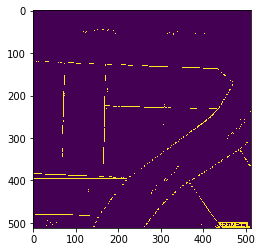

In [36]:
grey_image = skc.rgb2gray(copy_out)
plt.imshow(grey_image)

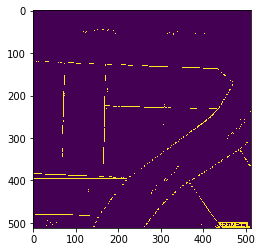

In [37]:
fgi = (grey_image*255).astype(np.uint8)
plt.imshow(fgi)

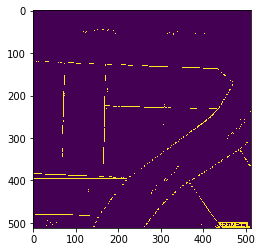

In [38]:
from skimage.util import img_as_ubyte
binary_img = img_as_ubyte(fgi)
plt.imshow(binary_img)

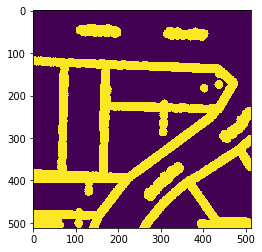

In [79]:
selem = disk(7)
dilated = dilation(binary_img, selem)  # imp
plt.imshow(dilated)

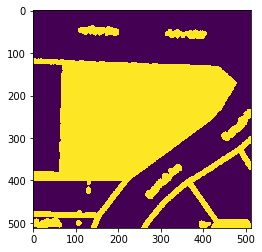

In [65]:
filled_holes = ndi.binary_fill_holes(dilated) #imp
plt.imshow(filled_holes)

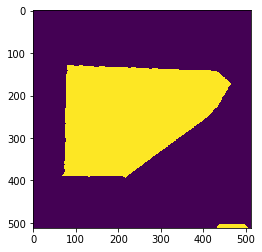

In [67]:
eroded2 = erosion(filled_holes, disk(12)) #imp
plt.imshow(eroded2)

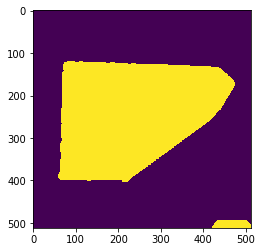

In [70]:
dilated2 = dilation(eroded2, disk(10)) #imp
plt.imshow(dilated2)

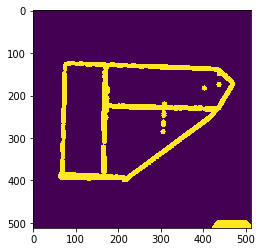

In [71]:
copy_eroded = np.empty_like(dilated)
copy_eroded[:] = dilated
for i in range(512):
    for j in range(512):
        if(not(dilated2[i][j])):
            copy_eroded[i][j] = False
plt.imshow(copy_eroded)

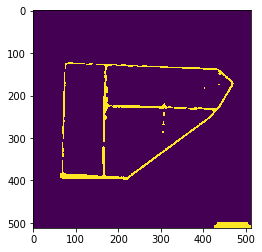

In [76]:
erosion3 = erosion(copy_eroded, disk(4))
plt.imshow(erosion3)

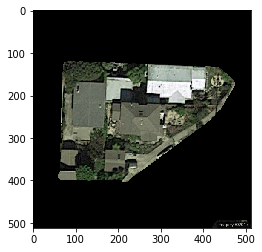

In [81]:
copy_main = np.empty_like (map_im)
copy_main[:] = map_im
for i in range(512):
    for j in range(512):
        if(not(dilated2[i][j])):
            copy_main[i][j][0] = 0
            copy_main[i][j][1] = 0
            copy_main[i][j][2] = 0
#         if(erosion3[i][j]):
#             copy_main[i][j][0] = 255
#             copy_main[i][j][1] = 255
#             copy_main[i][j][2] = 255
plt.imshow(copy_main)